# Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [4]:
dataset = pd.read_csv('Iris.csv')

In [5]:
# showing all starting 5 row values
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Remove the 'Id' column from the dataset as it is not needed for analysis
dataset.drop('Id',axis=1,inplace=True)

# Get the unique species labels in the dataset

In [7]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Encode the 'Species' column using Label Encoding to convert categorical values into numerical format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Species'] = label_encoder.fit_transform(dataset['Species'])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# Split the dataset into features (X) and target variable (y)
x = dataset.iloc[:, :-1].values  # Features: all rows, all columns except the last
y = dataset.iloc[:, -1].values    # Target: all rows, only the last column

In [10]:
# Split the dataset into training and testing sets with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [11]:
# Initialize the Gaussian Naive Bayes classifier and fit it to the training data
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

# Predict the species for a given input and print the corresponding class name


In [12]:
prediction = classifier.predict([[5.1, 3.5, 1.4, 0.2]])[0]  # Get the predicted class

if prediction == 0:
    print('Iris-setosa')
elif prediction == 1:
    print('Iris-versicolor')
else:
    print('Iris-virginica')

Iris-setosa


# Predict the target variable for the test set using the trained classifier


In [13]:
y_pred = classifier.predict(x_test)

# Calculate the confusion matrix to evaluate the classifier's performance on the test set


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

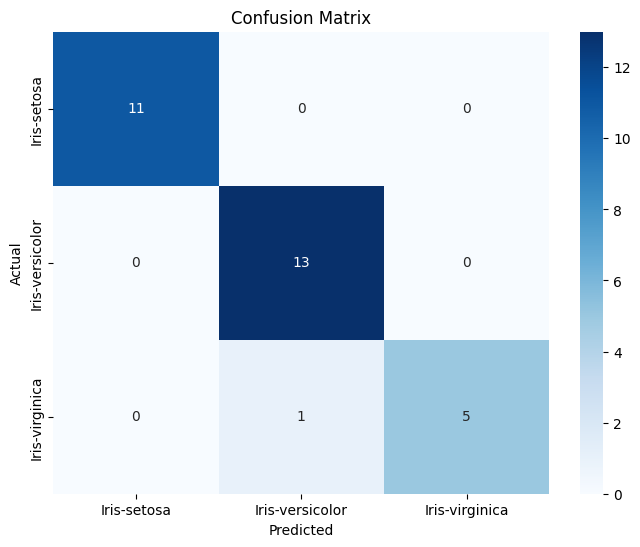

In [15]:
import seaborn as sns
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

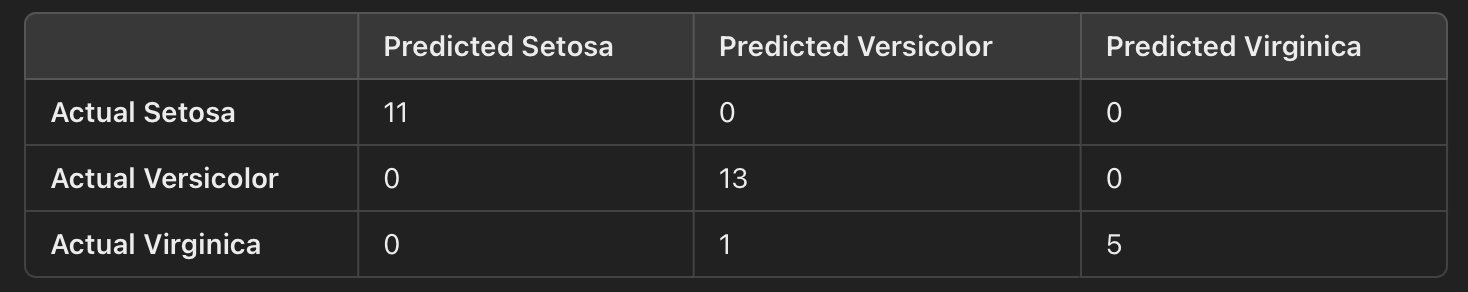

# Calculate the accuracy of the classifier on the test set


In [16]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667